**Project Title:** Bank Customer Churn Analysis      
**Author:** Kudzai Chihuri    
**Problem Statement:** The bank is experiencing high rate of customer churn, leading to revenue loss and loss of potential customers  
**Objective:** To analyse customer behavior and identify key factors that influence churn using exploratory data analysis  
**Goal:** To generate actionable insights to help the bank reduce customer churn rate   
**Dataset Overview:** This data set contains details of 10 000 bank customers, including:  
                                 demographics (gender, age, geography)  
                                 Account info (Balance, credit score, tenure)  
                                 Engagement metrics(Active member, number of products)  
**Target Variables:** Churn (churned = 1, retained = 0)

In [3]:
#IMPORTING NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#LOADING THE DATA
df = pd.read_csv(r'C:\Users\chihu\OneDrive\Documents\churn-analysis-project\Bank Customer Churn Prediction.csv')

In [5]:
#UNDERSTANDING THE DATA STRUCTURE
#Displaying first few rows of the dataset
print(df.head())

   customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0  


In [6]:
#Get summary of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB
None


In [7]:
#Check for missing values 
print(df.isnull().sum())

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64


In [8]:
#counts number of duplicate rows
df.duplicated().sum()


np.int64(0)

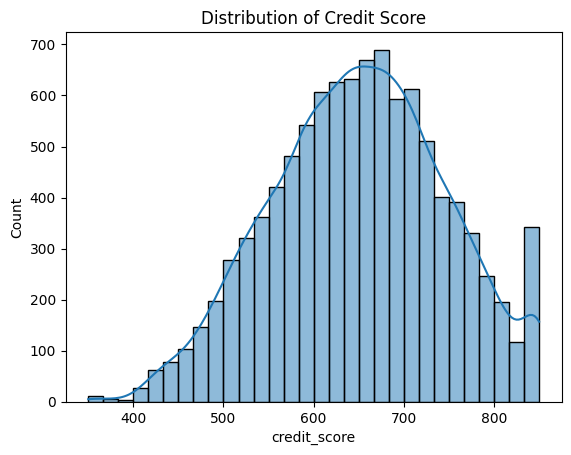

In [9]:
#VISUALIZATIONS
#Distribution of credit scores
sns.histplot(df['credit_score'], bins=30, kde=True)
plt.title('Distribution of Credit Score')
plt.show()
#Customers with credit scores between 600 and 700 has the highest counts.



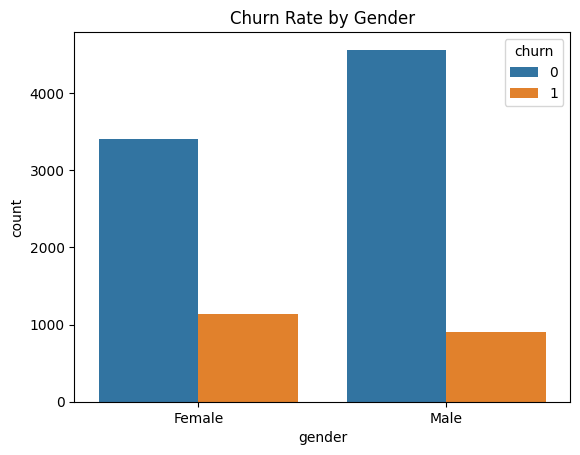

In [11]:
#Churn rate by gender
sns.countplot(x='gender', hue='churn', data=df)
plt.title('Churn Rate by Gender')
plt.savefig('churn_rate_by_gender.png', bbox_inches='tight')
plt.show()
#Females have high churn as compared to male

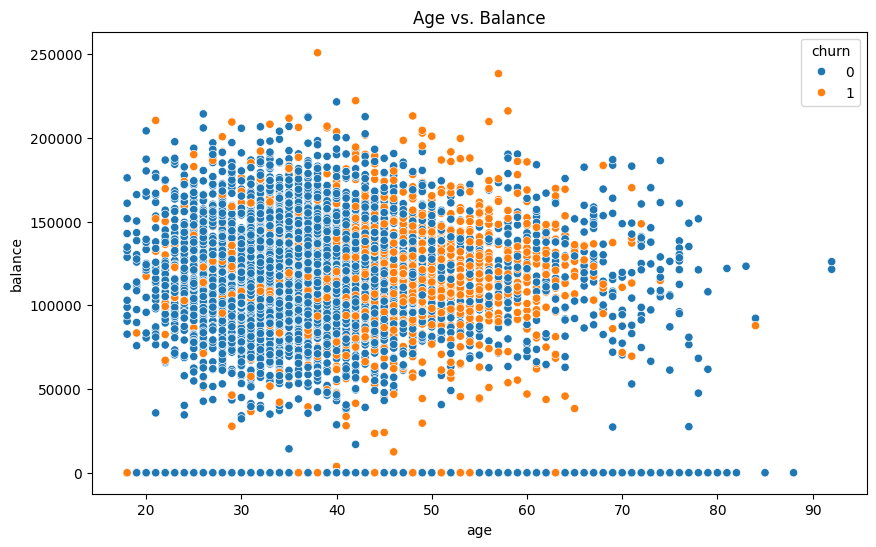

In [12]:
#Age vs.balance scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='balance', hue='churn', data=df)
plt.title('Age vs. Balance')
plt.savefig('age_vs_balance.png', bbox_inches='tight')
plt.show()
#Customers between the age of 50 and 60 have high churn rate and their balances lies between 50000 and 250000

In [14]:
#Hypothesis testing
#Using chi-square test to analyze relationship between gender and churn
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['gender'],df['churn'])
print(contingency_table)
chi2, p, dof, expected = chi2_contingency(contingency_table)
print('Chi-Square Statistics:', chi2)
print('p-value:', p)
if p < 0.05:
    print('there is a significant relationship between gender and churn.')
else:
    print('no significant relationship between gender and churn.')
#There is a significant relationship between gender and churn, this means there is evidence that the likelihood of a customer churning or leaving is related to their gender.

churn      0     1
gender            
Female  3404  1139
Male    4559   898
Chi-Square Statistics: 112.91857062096116
p-value: 2.2482100097131755e-26
there is a significant relationship between gender and churn.


In [15]:
#Using T-test to compare the average credit score of customers who churned vs those who did not churned
from scipy.stats import ttest_ind
churned = df[df['churn'] == 1] ['credit_score']
not_churned = df[df['churn'] == 0] ['credit_score']
t_stat, p_value = ttest_ind(churned,not_churned)
print('T-statistic:', t_stat)
print('p-value:', p_value)
if p_value < 0.05:
    print('there is a significant difference in average credit score between churned and non churned customers.')
else:
    print('no significant difference in average credit score between the two groups.')
#There is a significant difference in average credit score between churned and non churned customers, this means the average credit scores of the two groups , customers who churned and non-churned are not the same and the difference is statistically meaningful and not by chance. 

T-statistic: -2.7100778888729833
p-value: 0.006738213892192373
there is a significant difference in average credit score between churned and non churned customers.


                Feature importance Analysis
The analysis will tell us which features like age, balance,etc are most useful in predicting whether a customer will churn.

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
df = df.drop('customer_id', axis=1)

In [21]:
df =pd.get_dummies(df,drop_first=True)

In [22]:
X = df.drop('churn', axis=1)
y = df['churn']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

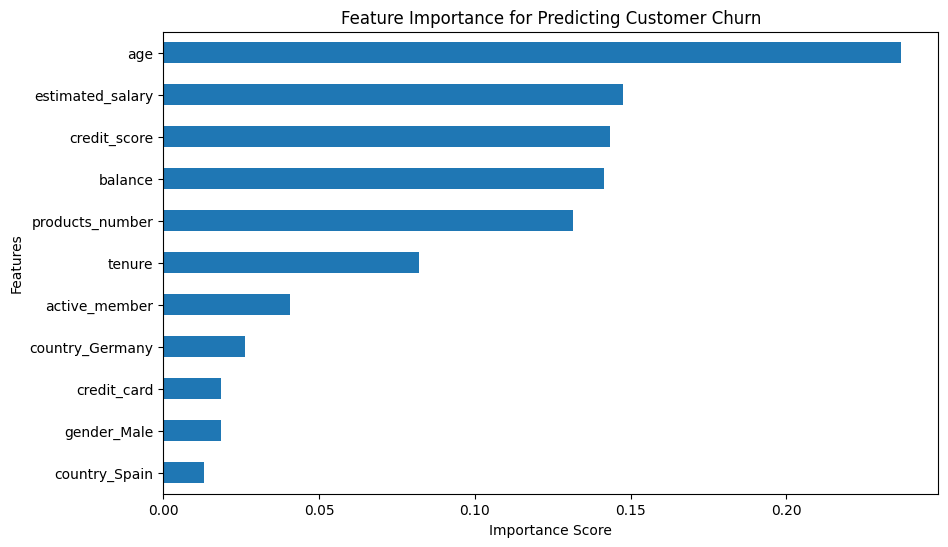

In [25]:
importances = pd.Series(model.feature_importances_,index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title('Feature Importance for Predicting Customer Churn')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.savefig('feature_importance.png', bbox_inches='tight')
plt.show()
#Age is the most important feature for predicting customer churn.

                                                    **findings of the analysis**

- Most customers have credit scores between 600 and 700
- Female churn rate is higher than male
- Most customers between the age of 50 and 60 have high churn rate
- Customers with high bank account balance churn
- There is a significant relatioinship between gender and churn
- There is also a significant diffrence between average credit score of churned vs non churned customers
- Age is the most significant predictor of customer churn

                                                    **Recommendations**

- Old aged customers having high churn rate may indicate that this age group may be more vulnerable to online scams or financial exploitation, which could lead to distrust in banking services and eventualy churn.As a bank they is need to protect these old aged customers from being scammed.
- female having higher churn rate indicates they is need to conduct deeper customer surveys or interviews investigating why they are leaving more often.
- If churned customers tend to have lower credit scores on average, they is need to implement financial support programs were you offer credit counseling, tools to improve financial literacy, or personalised recommendations to help improve their creditworthiness.
- Since most customers have credit score between 600 and 700, they is need to create a customer segment for them and provide proactive customer service, loyalty programs, or financial education to boost their satisfaction and engagement.
- Having customers with high bank account balance churning reflects the bank being at high risk. They is need to benchmark against competitors by ensuring your products offerings and customer experience match or exceed what competitors provide to high-net-worth individuals. 
                                                    



                     

                  